# Dynamical Decoupling and Randomized Benchmarking on 2 qubit

## Setup

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from qutip import *
from qutip.qip.operations import *
from qutip.qip.gates import *

from scipy.signal import argrelextrema

C:\Users\XPS13-9360\AppData\Local\Temp\ipykernel_12780\2894902162.py:8: DeprecationWarning: Importation from qutip.qip.gates is deprecated.Please use e.g.
 from qutip.qip.operations import cnot

  from qutip.qip.gates import *


In [2]:
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
with open("rename.py") as f:
    exec(f.read())

## Finding pulse duration

Parameters

In [4]:
VStd = 0.01
phaseStd = 0.382 / 180 * np.pi

detuningStd = 52769
samplingRate = 5898.24e6 # 5.89824 GS/s
omega = 20e6 # 20MHz

VNaught = 1
hbar = 1
phiNaught = 0
aNaught = 25 / 46

V = VNaught + np.random.normal(scale=VStd)
phi = phiNaught + np.random.normal(scale=phaseStd)
I = np.cos(phi)
Q = np.sin(phi)

In [5]:
def H_solver(t_0 = 0, t_final = 100e-9, init_state = basis(2,0), collapse_operators = [sigmaz()]):
    # Hamiltonian
    def H(t, args):
        dwt = np.random.normal(scale=detuningStd) * t
        s = aNaught - (1 - aNaught) * np.cos(2 * np.pi * t / t_final)
        return omega * np.pi * V * s *((-I * np.cos(dwt) + Q * np.sin(dwt)) * sigma_x() + (I * np.sin(dwt) - Q * np.cos(dwt)) * sigma_y()) 
    t_list = np.arange(t_0, t_final, 1/samplingRate)
    result = sesolve(H, init_state, t_list, collapse_operators,options=Options(nsteps=10000))
    return result

In [6]:
result_find_pulse = H_solver()

Text(0, 0.5, 'Expectation Value')

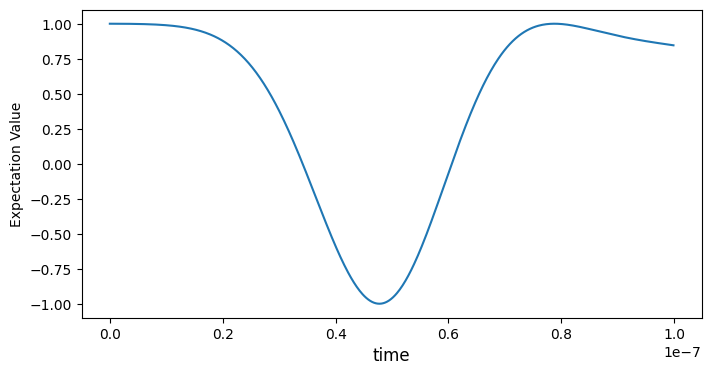

In [7]:
plot_expectation_values(result_find_pulse)
plt.xlabel("time")
plt.ylabel("Expectation Value")

Find the pi-pulse by optimizing

In [8]:
minimum_array = argrelextrema(result_find_pulse.expect[0], np.less)
first_min = minimum_array[0][0]
pi_pulse_duration = result_find_pulse.times[first_min]
pi_half_pulse_duration = pi_pulse_duration/2
print(pi_pulse_duration,pi_half_pulse_duration)

4.7810872395833335e-08 2.3905436197916668e-08


Solving the Hamiltonian

In [9]:
result = H_solver(
    t_final = pi_pulse_duration,
    collapse_operators = [sigmaz(),sigmax(),sigmay()]
    )

The plots are expectation value for $\sigma_z, \sigma_x,\sigma_y$ correspondingly.

Text(0, 0.5, 'Expectation Value')

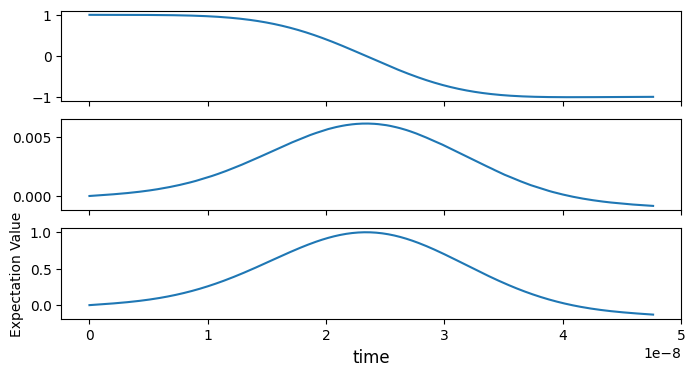

In [10]:
plot_expectation_values(result)
plt.xlabel("time")
plt.ylabel("Expectation Value")

In [11]:
np.savetxt('pulse_duration.txt',[pi_pulse_duration,pi_half_pulse_duration])